In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Telecom Customers Churn.csv ')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Step 1: Inspect data using df.info() function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Replace TotalCharges blank values with 0 as tenure is zero and datatype to float.

df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [34]:
# Checking the info once again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
# To find null values

df.isnull().sum().sum()

np.int64(0)

In [36]:
# use describe() to do descriptive analysis

df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [37]:
#To check Duplicate data values based on unique column and overall rows

df.duplicated().sum()
df["customerID"].duplicated().sum()

np.int64(0)

In [22]:
# Defining function to convert 0 and 1 value of senior citizen to yes/no  to make it easier to understand

def conv(value):
    if value == 1:
        return "yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [38]:
# head() function shows the first five rows of the data

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


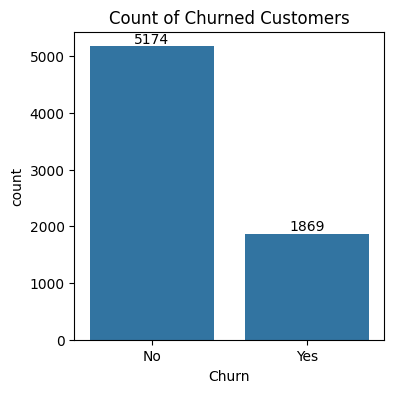

In [39]:
# To plot count plot of churned customers overall
plt.figure(figsize = (4,4))
ax = sns.countplot(x = df['Churn'], data =df)
ax.bar_label(ax.containers[0])
plt.title("Count of Churned Customers")
plt.show()

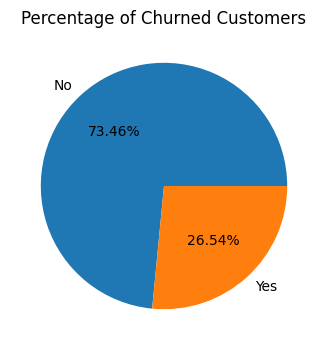

In [ ]:
# to plot pie chart to determine the percentage of churned customers. 

plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

In [ ]:
# From the given pie chart we can conclude that 26.54% of our customers have churned out.
# Now let's explore the reason behind it.

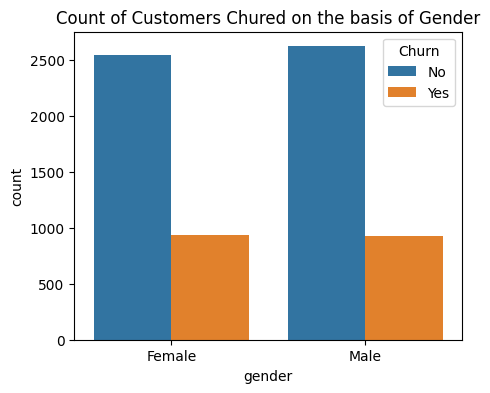

In [20]:
# To plot Countplot of churned customers based on gender
plt.figure(figsize = (5,4))
sns.countplot(x = df["gender"], data = df, hue = "Churn")
plt.title("Count of Customers Chured on the basis of Gender")
plt.show()

<Figure size 400x400 with 0 Axes>

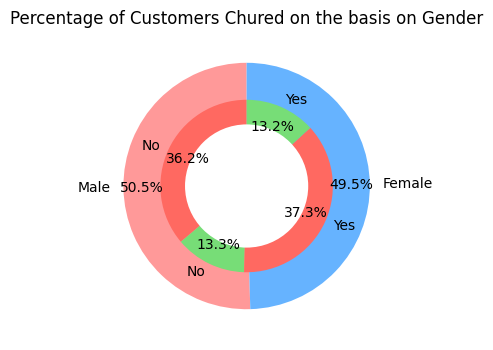

In [28]:
plt.figure(figsize =(4,4))
gender_counts = df['gender'].value_counts()
churn_by_gender = df.groupby(['gender', 'Churn']).size().unstack()
# Colors
colors_gender = ['#ff9999','#66b3ff']
colors_churn = ['#ff6961','#77dd77']
# Outer pie (Gender)
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(gender_counts, labels=gender_counts.index, colors=colors_gender,
       radius=1, startangle=90, autopct='%1.1f%%', pctdistance=0.85)
# Inner pie (Churn)
ax.pie(churn_by_gender.values.flatten(), 
       labels=churn_by_gender.columns.repeat(churn_by_gender.shape[0]),
       colors=colors_churn*2, radius=0.7, startangle=90,
       autopct='%1.1f%%', pctdistance=0.75)
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig.gca().add_artist(centre_circle)
#gb = df.groupby("gender", "Churn").agg({'gender':'count', 'Churn':'Count'})
#plt.pie(gb['gender'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Customers Chured on the basis on Gender")
plt.show()

In [ ]:
# from the given figure we can conclude that all both male and female customers had churned equally, therefore there is no specific gender role.

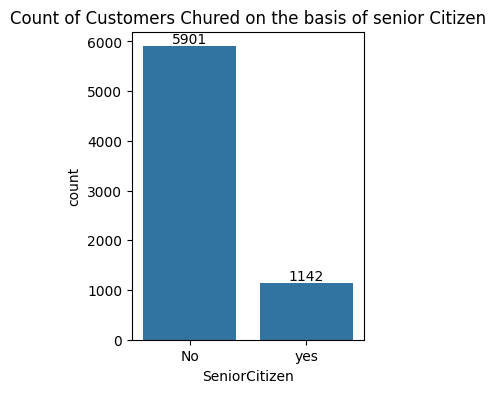

In [42]:
# To plot Countplot of churned customers on the basis of Senior Citizen

plt.figure(figsize = (3,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers Chured on the basis of senior Citizen")
plt.show()

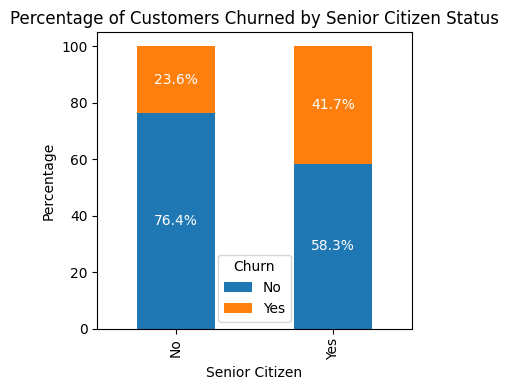

In [57]:
# Step 1: Create a cross-tab for 'SeniorCitizen' and 'Churn'
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Normalize to get percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart
ax = cross_tab_percent.plot(kind='bar', stacked=True, figsize=(4, 4))

# Step 4: Add percentage labels
for i, (index, row) in enumerate(cross_tab_percent.iterrows()):
    cumulative = 0
    for j, val in enumerate(row):
        plt.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=10)
        cumulative += val

# Formatting
plt.title("Percentage of Customers Churned by Senior Citizen Status")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Assuming 0=No, 1=Yes
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [ ]:
#Comparative a greater percentage of people in senior citizen category have churned

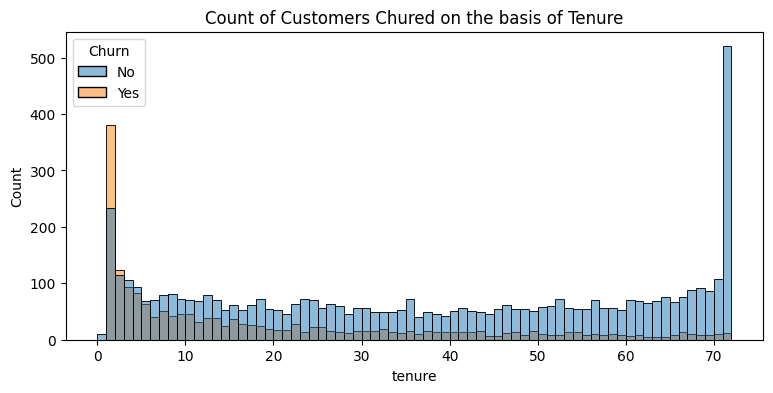

In [48]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn") 
plt.title("Count of Customers Chured on the basis of Tenure")
plt.show()

In [ ]:
# People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have Churned out

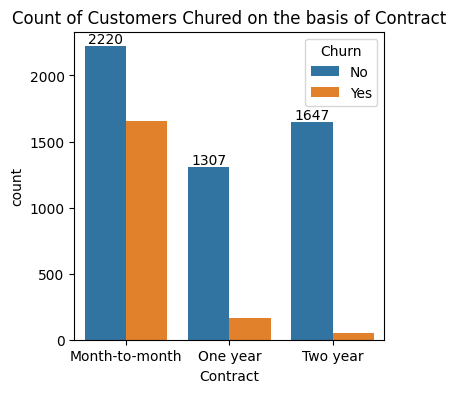

In [51]:
# To plot Countplot of churned customers on the basis of Senior Citizen

plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers Chured on the basis of Contract")
plt.show()

In [ ]:
# People who have month to month contract are more likely to Churn out than from thoes who have 1 or 2 years of Contract

In [52]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

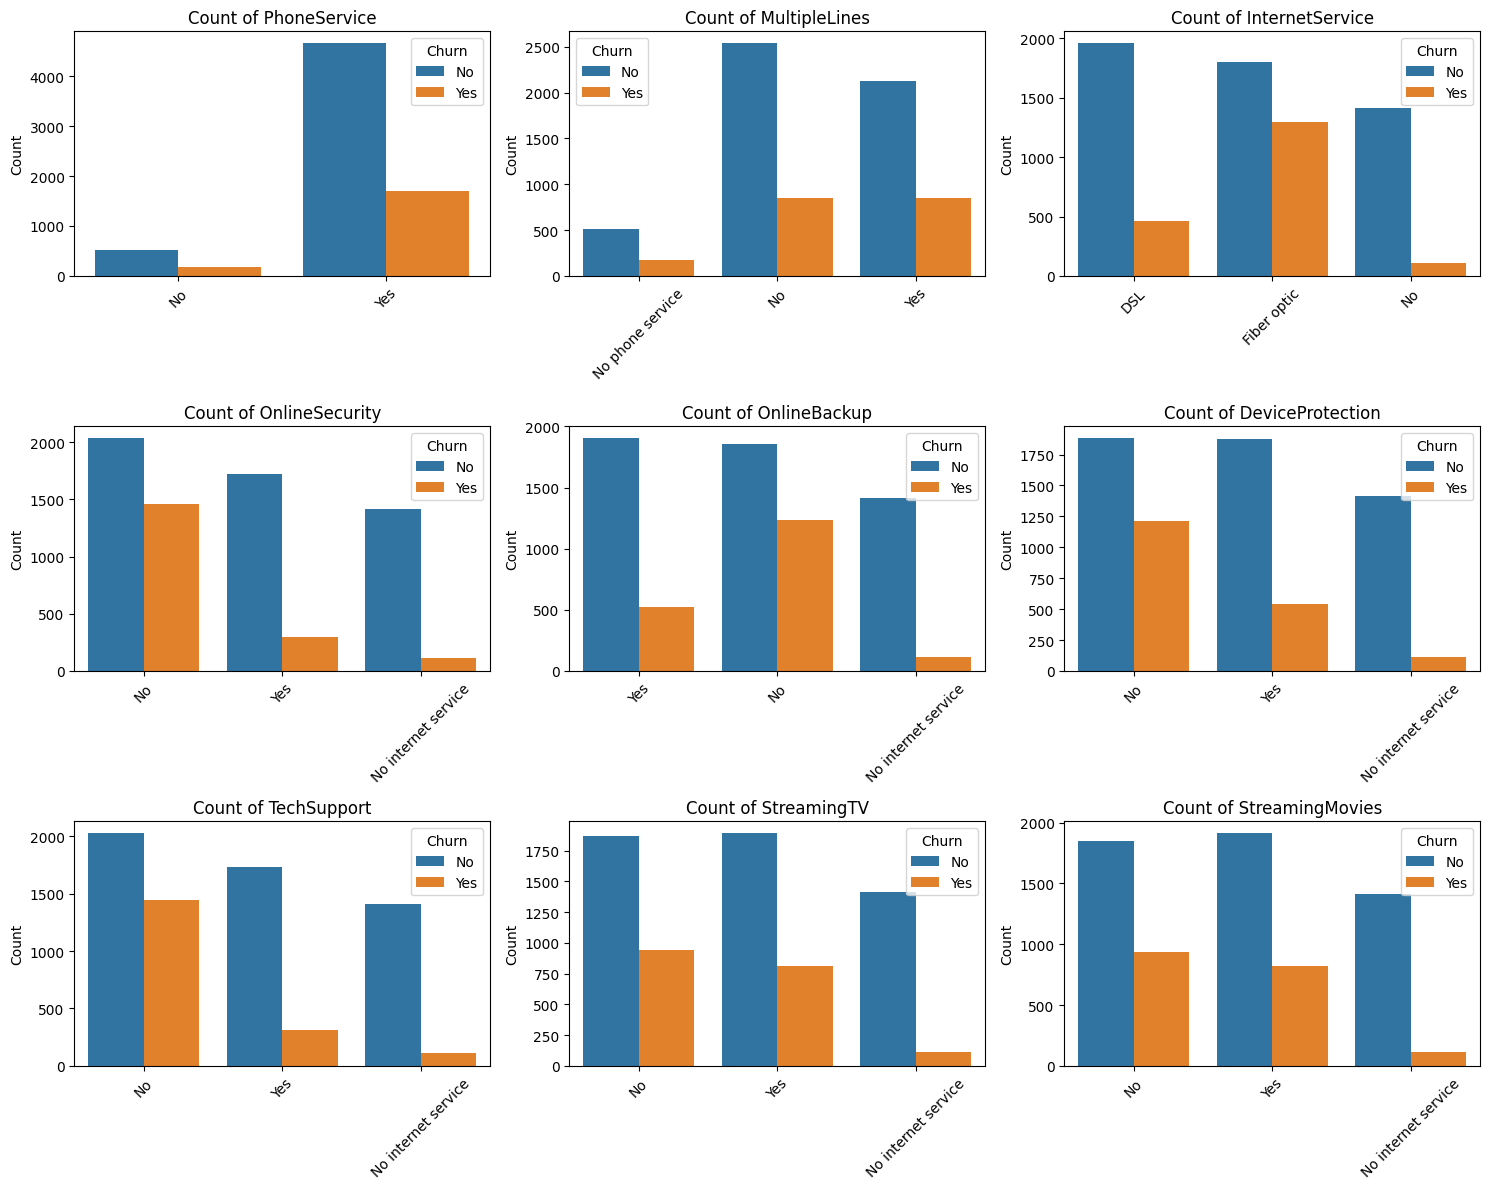

In [55]:
# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Setup grid size: 3 rows x 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each countplot in its subplot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel("")

# Remove any empty subplot if cols < total subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#Customers with Fiber optic internet and active value-added services (like streaming, online backup, and tech support) show higher churn rates, possibly due to dissatisfaction with service or cost. In contrast, users with no internet or fewer services tend to churn less, indicating lower engagement or simpler needs.

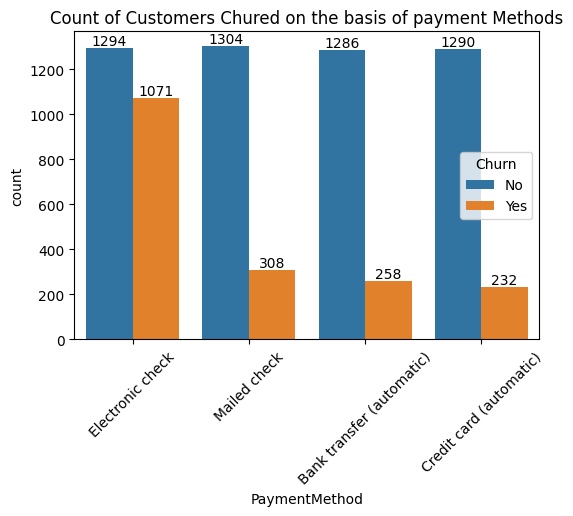

In [70]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers Chured on the basis of payment Methods")
plt.xticks(rotation =45)
plt.show()

In [ ]:
# Customer is likely to churned when they are using electromic check as a payment method.